In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import FreqDist

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv('processed_reviews.csv')
df = df[['id', 'listing_id','comments', 'latitude', 'longitude']]
df['comments'] = df['comments'].astype(str)

In [75]:
original_df = pd.read_csv('reviews.csv')
original_df = original_df[['id', 'comments']]
original_df['comments'] = original_df['comments'].astype(str)

In [76]:
df = df.set_index('id')
original_df = original_df.set_index('id')
df = df.join(original_df, lsuffix='_stemmed')[['comments', 'comments_stemmed', 'listing_id', 'latitude', 'longitude']]

In [77]:
df.head()

,comments,comments_stemmed,listing_id,latitude,longitude
id,,,,,
21032,"We loved staying at Phillipa's place in Chelsea. The flat was lovely, and the neighborhood was great. Lots of fun shops, and close to two metro stops. We would love to stay there again!",place chelsea flat lovely neighborhood great lot fun shop metro stop,15400,51.48796,-0.16898
30672,"The flat was bright, comfortable and clean and Adriano was pleasant and gracious about accommodating us at the last minute. The Brixton tube was a very short walk away and there were plenty of buses. There are lots of fast food restaurants, banks, and shops along the main street.",flat bright comfortable clean adriano pleasant gracious last minute tube short plenty bus fast food restaurant bank shop main street,11551,51.46225,-0.11732
32236,We stayed with Adriano and Valerio for a week when first moving to London. The apartment is great and very clean compared to a lot of places we've seen in London. Situated very close to Brixton tube and good bus links to central London. Thanks guys!,week apartment great clean lot place close tube good bus link central thank guy,11551,51.46225,-0.11732
35618,"10,000 times better and cheaper than staying at a hotel! The house is immaculate, very spacious and very well decorated and all the furniture is brand new. It's very quiet outside so you can sleep soundly...Grace is a wonderful host who really makes sure your stay is comfortable and the best ever...and a wonderful cook too...her dishes are deli...",time cheap hotel house spacious furniture brand new quiet outside sleep wonderful host sure comfortable good wonderful cook dish delicious location huge shopping mall,25123,51.57224,-0.20906
41044,"Adriano was a fantastic host. We felt very at home while staying there. Our first morning we woke up and saw the dining table set for breakfast which was much appreciated. His flat is conveniently located a block from the tube station, with a number of shops and restaurants in the area as well. His place was very clean and tidy, overall just a ...",host first morning dining table breakfast flat block tube station number shop area place clean tidy overall fantastic experience,11551,51.46225,-0.11732


In [78]:
from nltk.corpus import wordnet as wn

In [79]:
def lemmatization(word): # filter noun and adjective
    pos_w = set()   
    for w in wn.synsets(word):
        if w.name().split('.')[0] == word:
            pos_w.add(w.pos())
    return u'a' in pos_w or u's' in pos_w

def freq_words_adj(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    fdict = {k:v for k,v in fdist.most_common(3000) if lemmatization(k) == True}
    
    return fdict

In [80]:
def plot_freq(fdict, terms = 30):
    words_df = pd.DataFrame({'word':list(fdict.keys()), 'count':list(fdict.values())})
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(30,10))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set_xticklabels(d['word'][:terms], rotation = -55, fontsize = 12)
    ax.xaxis.set_ticks_position('bottom')
    ax.set(ylabel = 'Count')
    plt.show()

In [81]:
comments = df['comments_stemmed']

In [82]:
fdict = freq_words_adj(comments)

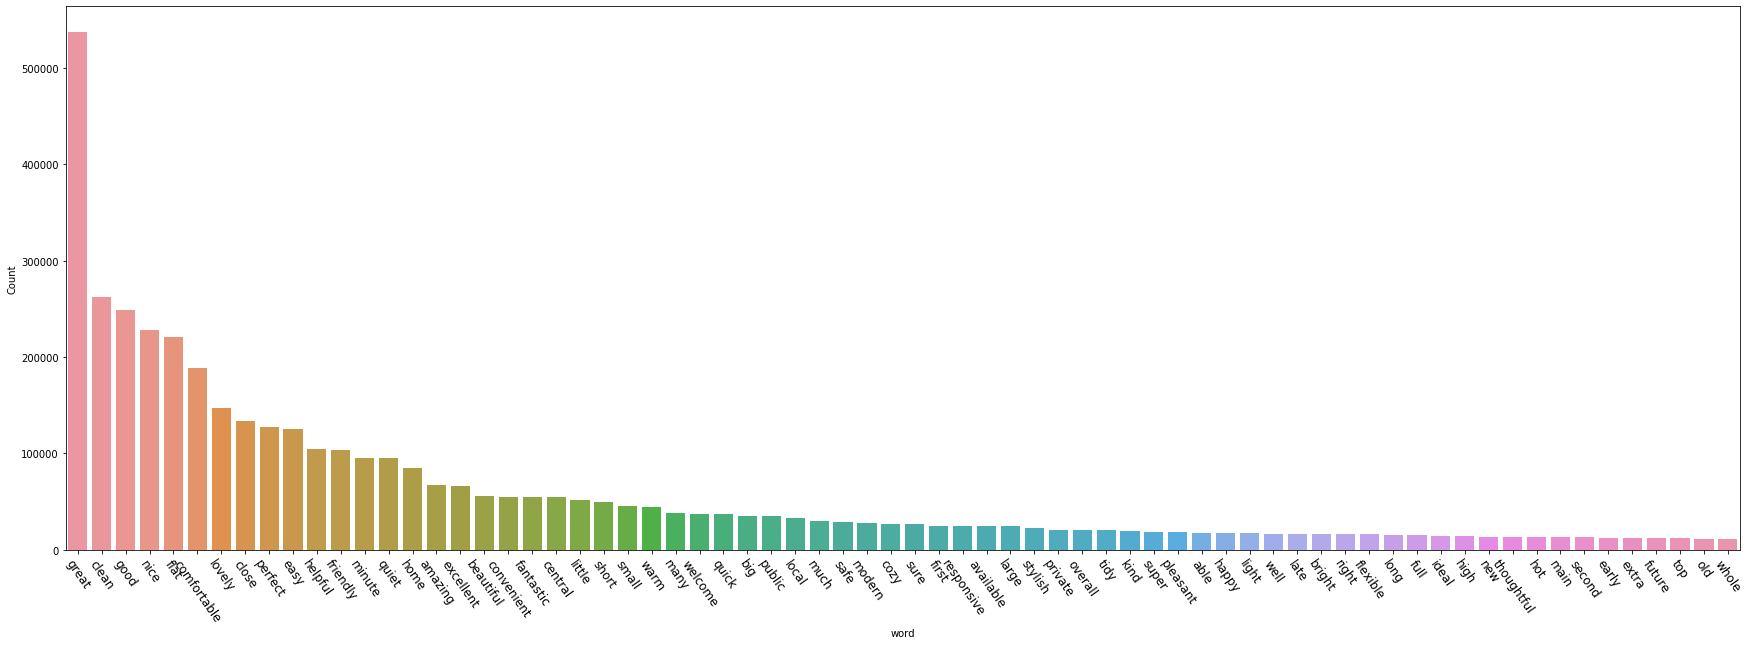

In [83]:
plot_freq(fdict, 70)

In [84]:
neatness = ['clean', 'nice', 'comfortable', 'modern', 'tidy', 'stylish', "convenient", "thoughtful", "interesting", "huge", "enjoyable", "relaxed", "adorable", "suitable", "fit", "apt", "roomy", "ample", "extensive"]
location = ['quiet', 'beautiful', 'quick', 'safe', 'quickly', 'easy', "central", "accessible", "nearby", "serene"]
host = ['helpful', 'friendly', 'responsive', 'available', 'kind', 'pleasant', 'punctual', "flexible", "hospitable", "attentive", "communicative", "accommodating", "gracious", "prompt", "professional", "informative", "understanding", "respectful", "reliable", "knowledgeable", "caring", "courteous", "answering", "nervous", "amenable"]
overall = ['great', 'good', 'perfect', 'super', 'high', 'ideal', 'happy', 'amazing', 'excellent', "right", "ideal", "cute", "fabulous", "brilliant", "free", "gorgeous", "useful", "handy", "charming", "superb", "incredible", "outstanding", "delightful", "welcoming", "stunning", "vibrant", "practical", "satisfied", "glad", "adequate", "memorable", "proper", "seamless"]

neatness_a = ["terrific", "uncomfortable", "narrow", "tight", "awkward", "aesthetic", "awful"]
location_a = ["loud", "annoying", "inconvenient", "intrusive", "crowded", "bustiling", "stuffy"]
host_a = []
overall_a = ["negative", "wrong", "sad", "poor", "unable", "limited", "odd", "disappointing", "minimalist"]

In [85]:
def find_similarities(words, words_antonyms, min_acceptable_reputation=2):
    synonyms = set()
    antonyms = set()
    for word in words:
        for syn in wn.synsets(word):
            if '_' not in syn.name().split(".")[0]:
                synonyms.add(syn.name().split(".")[0])
            for lemma in syn.lemmas():
                if lemma.count() < min_acceptable_reputation:
                    continue
                if '_' not in lemma.name():
                    synonyms.add(lemma.name())
                if lemma.antonyms():
                    if '_' not in lemma.antonyms()[0].name() and lemma.antonyms()[0].name() != word and lemma.antonyms()[0].name() not in synonyms:
                        antonyms.add(lemma.antonyms()[0].name())
    return synonyms, antonyms        

In [86]:
neatness_syn, neatness_ant = find_similarities(neatness, neatness_a)
print(neatness_syn)
print(neatness_ant)

{'slack', 'houseclean', 'prosperous', 'concern', 'relax', 'suitable', 'across-the-board', 'ample', 'broad', 'huge', 'fairly', 'accommodate', 'burst', 'thoughtful', 'paroxysm', 'occupy', 'primed', 'modern', 'sporting', 'interesting', 'meet', 'kempt', 'set', 'wide', 'comfortable', 'suit', 'goodly', 'heedful', 'scavenge', 'pertinent', 'cleanse', 'plumb', 'apposite', 'interest', 'roommate', 'fit', 'fashionable', 'tidy', 'blank', 'enjoyable', 'adorable', 'respectable', 'nice', 'dainty', 'mod', 'stylish', 'desirable', 'uninfected', 'vast', 'correspond', 'agree', 'apt', 'suited', 'plentiful', 'sizable', 'clean', 'loosen', 'courteous', 'extensive', 'decent', 'equip', 'commodious', 'roomy', 'convenient', 'relaxed', 'match', 'liable', 'advanced', 'immense'}
{'unfashionable', 'meager', 'unfit', 'tense', 'nasty', 'dirty', 'disagree', 'uncomfortable', 'nonmodern', 'uninteresting', 'bore', 'inconvenient'}


In [87]:
location_syn, location_ant = find_similarities(location, location_a)
print(location_syn)
print(location_ant)

{'hushed', 'slow', 'prosperous', 'agile', 'accessible', 'immediate', 'beautiful', 'still', 'subdued', 'calm', 'safe', 'key', 'comfortable', 'tranquillity', 'fundamental', 'quick', 'dependable', 'quiet', 'easy', 'easily', 'serenity', 'nearby', 'central', 'quickly', 'quietly', 'quieten', 'cursorily', 'slowly', 'serene', 'lull', 'condom', 'cardinal', 'speedily', 'promptly', 'repose', 'silence', 'rapidly', 'placid', 'flying'}
{'peripheral', 'unquietly', 'slowly', 'dangerous', 'difficult', 'noisy', 'sound', 'agitate', 'unquiet', 'ugly'}


In [88]:
host_syn, host_ant = find_similarities(host, host_a)
print(host_syn)
print(host_ant)

{'immediate', 'handle', 'agreement', 'gracious', 'caring', 'knowledgeable', 'suit', 'illuminating', 'heedful', 'remind', 'apprehension', 'informative', 'worry', 'form', 'understanding', 'lovingness', 'enlightening', 'responsive', 'reply', 'aflutter', 'like', 'realize', 'move', 'fit', 'motivate', 'professional', 'accommodate', 'communicative', 'benignant', 'flexible', 'respectful', 'suffice', 'prompt', 'sympathize', 'reliable', 'adapt', 'do', 'skittish', 'friendly', 'care', 'incite', 'instructive', 'master', 'lodge', 'resolve', 'oblige', 'honest', 'inspire', 'kind', 'anxious', 'answering', 'see', 'amenable', 'punctual', 'deal', 'sympathy', 'manage', 'courteous', 'authentic', 'available', 'answer', 'hold', 'translate', 'understand', 'helpful', 'sort', 'wish', 'accommodating', 'learned', 'well-educated', 'compromising', 'dependable', 'elastic', 'attentive', 'knowing', 'intimate', 'hospitable', 'nervous', 'reconcile', 'reason', 'pleasant', 'respond', 'reactive'}
{'unhelpful', 'unreliable',

In [89]:
overall_syn, overall_ant = find_similarities(overall, overall_a)
print(overall_syn)
print(overall_ant)

{'puzzle', 'welcome', 'free', 'gorgeous', 'perplex', 'fabulous', 'ace', 'crack', 'proper', 'absolve', 'dear', 'beaming', 'adept', 'enough', 'brilliant', 'great', 'arresting', 'prominent', 'perfective', 'veracious', 'stunning', 'big', 'good', 'full', 'utilitarian', 'commodity', 'barren', 'relinquish', 'happy', 'eminent', 'thoroughly', 'astound', 'serious', 'pure', 'super', 'useful', 'fulfill', 'incredible', 'quenched', 'magical', 'outstanding', 'brainy', 'hardheaded', 'effective', 'dislodge', 'ideal', 'capture', 'expert', 'adequate', 'properly', 'astonishing', 'skillful', 'relieve', 'bewilder', 'satisfied', 'correctly', 'magic', 'handy', 'high', 'delightful', 'exceedingly', 'charming', 'mighty', 'rid', 'satisfy', 'memorable', 'heights', 'meet', 'welcoming', 'utter', 'release', 'capital', 'respectable', 'estimable', 'arrant', 'beneficial', 'high-pitched', 'gravid', 'right', 'cunning', 'spare', 'amaze', 'captivate', 'exempt', 'mythological', 'gratify', 'gladiolus', 'vibrant', 'vivacious',

In [90]:
labeled_rows = 50000
msk_size = (labeled_rows / df.count())[0]
msk_size

0.04553219854952628

In [91]:
msk = np.random.rand(len(df)) < msk_size

In [92]:
df.head(10)

,comments,comments_stemmed,listing_id,latitude,longitude
id,,,,,
21032,"We loved staying at Phillipa's place in Chelsea. The flat was lovely, and the neighborhood was great. Lots of fun shops, and close to two metro stops. We would love to stay there again!",place chelsea flat lovely neighborhood great lot fun shop metro stop,15400,51.48796,-0.16898
30672,"The flat was bright, comfortable and clean and Adriano was pleasant and gracious about accommodating us at the last minute. The Brixton tube was a very short walk away and there were plenty of buses. There are lots of fast food restaurants, banks, and shops along the main street.",flat bright comfortable clean adriano pleasant gracious last minute tube short plenty bus fast food restaurant bank shop main street,11551,51.46225,-0.11732
32236,We stayed with Adriano and Valerio for a week when first moving to London. The apartment is great and very clean compared to a lot of places we've seen in London. Situated very close to Brixton tube and good bus links to central London. Thanks guys!,week apartment great clean lot place close tube good bus link central thank guy,11551,51.46225,-0.11732
35618,"10,000 times better and cheaper than staying at a hotel! The house is immaculate, very spacious and very well decorated and all the furniture is brand new. It's very quiet outside so you can sleep soundly...Grace is a wonderful host who really makes sure your stay is comfortable and the best ever...and a wonderful cook too...her dishes are deli...",time cheap hotel house spacious furniture brand new quiet outside sleep wonderful host sure comfortable good wonderful cook dish delicious location huge shopping mall,25123,51.57224,-0.20906
41044,"Adriano was a fantastic host. We felt very at home while staying there. Our first morning we woke up and saw the dining table set for breakfast which was much appreciated. His flat is conveniently located a block from the tube station, with a number of shops and restaurants in the area as well. His place was very clean and tidy, overall just a ...",host first morning dining table breakfast flat block tube station number shop area place clean tidy overall fantastic experience,11551,51.46225,-0.11732
41216,Grace's house is so clean! It's probably the cleanest I have ever seen. The room is super comfy and rather roomy. She's a great host.\r\n\r\n\r\n,room comfy great host,25123,51.57224,-0.20906
45398,"Grace G is awesome, very courteous and friendly in person. She offers great hospitality which I appreciate. Her home is modern, well-maintained, clean and comfortable. The location is at a quiet and nice suburban neighborhood within walking distance to tube station. The house is equipped with WIFI internet, which is convenient to use with noteb...",grace awesome courteous friendly person great hospitality home modern well clean comfortable location quiet nice suburban neighborhood distance tube station house convenient use notebook fresh linen towel breakfast kitchen grocery item guest overall,25123,51.57224,-0.20906
48926,We had a most wonderful stay with Adriano and Valerio. They are both interesting and interested hosts who serve a delicious cappuccino with breakfast in the morninig. Their place is small but clean and comfy. Central London is a short bus or tube ride ... very convenient. We look forward to returning to London and staying with them again.,wonderful stay valerio interesting interested host delicious cappuccino breakfast place small clean short bus tube convenient look staying,11551,51.46225,-0.11732
52972,"I'm so glad I decided to stay at Grace's place. It's so comfortable, clean, and pretty. Everything I needed was there. The neighborhood is great and I had a wonderful time walking through it and seeing the local shops. Grocery stores and public transportation are very easy to get to. Grace herself is the perfect host, very generous and a gra...",stay grace place comfortable pretty neighborhood great wonderful time local shop grocer

In [93]:
to_label_df = df[700000:710000]
to_label_df.count()[0]

10000

In [94]:
to_label_df.head(10)

,comments,comments_stemmed,listing_id,latitude,longitude
id,,,,,
337115724,"Beautiful house in amazing location, everything is beautiful, it's comfortable and cozy. Excellent communication with Carlos and Tina!",location beautiful comfortable cozy excellent communication,27192654,51.49974,-0.11014
337115750,It was a great place - we stayed there for 4 days - 2-3 min from the next tube station - nice and calm neighbourhood - the clean flat is very well equiped and has a fast internet connection - we really had a good time there - Christine ws great and very quick to answer all our questions via What´s app - unfortunately we didn´t meet in person - ...,great place day next station nice calm neighbourhood flat fast internet connection good time great quick answer question app person thank lot,21875830,51.52431,-0.19969
337115765,"Great apartment, great location close to station, communication very good",great apartment great location close station communication good,16726837,51.51386,0.01140
337115766,"We really enjoyed our stay! Loved the details like umbrellas, tube maps, and charging adaptors (USB and UK/EU adaptor) - very thoughtful! Stay recommended!",stay loved detail umbrella map adaptor usb adaptor thoughtful stay,23802774,51.49462,-0.29723
337115786,Aleksander and Jimmy are totally amazing hosts. They provide everything you need and support you with everything you can imagine. We can recommend this apartment to everyone how wants to explore London. We would stay there again with no doubt. Also we fall in love with (Hidden by Airbnb) home,amazing host imagine recommend apartment doubt love airbnb home,20510909,51.48990,-0.13799
337115791,"Kyaw is an amazing host, he prepared with fresh flowers in our room. He offered to come for us to the station, sometines he asked if everything was ok. He was really kind and helpful! The flat was very clean, our room was clean and comfortable. When we met in the kitchen we always had a nice chat, everything was amazing, recommended!",host fresh flower room station sometine helpful flat clean room clean comfortable kitchen nice amazing,24668241,51.60038,-0.10362
337115799,"Well placed, spacious and very nice apartment.",spacious nice apartment,21341738,51.51636,-0.06729
337115829,"Francois and his place were both wonderful!\nIt was the perfect location for what I needed.\nBeautiful space with a wonderful outdoor space as well.\nAs a solo female traveler I felt safe the entire time in this space and in the building.\nCommunication was timely and everything I needed was there!\n\nThanks again, Francois!",wonderful perfect location beautiful space wonderful outdoor space solo female traveler safe entire time space building communication thank francois,8622409,51.52951,-0.08453
337115865,"Great position, near tube and bus stops. The room was very nice and clean, Lydia and her husband are lovely and friendly people and they gave us all the comforts we needed.",great position tube bus room lovely friendly people comfort,24073930,51.43013,-0.18849


In [95]:
def make_score(pos_words, neg_words, min_score = 1):
    initial_score = 3 # with premeditation not start counting from half (4) but from point less
    min_score = 1
    max_score = 7
    
    if pos_words == 0 and neg_words == 0:
        return initial_score
    
    if neg_words > 0:
        return max(min_score, initial_score - neg_words)
    
    return min(max_score, initial_score + pos_words)

In [96]:
def create_rate(comment, label_synonyms, label_antonyms):
    pos_words = 0
    neg_words = 0
    words = comment.split()
    for word in words:
        if word in label_synonyms:
            pos_words +=1
            continue
        if word in label_antonyms:
            neg_words +=1
    return make_score(pos_words, neg_words)

In [97]:
labeled_df = to_label_df.copy()

In [98]:
labeled_df['neatness'] = labeled_df['comments_stemmed'].apply(create_rate, args = (neatness_syn, neatness_ant,))
labeled_df['location'] = labeled_df['comments_stemmed'].apply(create_rate, args = (location_syn, location_ant,))
labeled_df['host'] = labeled_df['comments_stemmed'].apply(create_rate, args = (host_syn, host_ant,))
labeled_df['overall'] = labeled_df['comments_stemmed'].apply(create_rate, args = (overall_syn, overall_ant,))

In [99]:
labeled_df.head(20)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
337115724,"Beautiful house in amazing location, everything is beautiful, it's comfortable and cozy. Excellent communication with Carlos and Tina!",location beautiful comfortable cozy excellent communication,27192654,51.49974,-0.11014,4,5,3,4
337115750,It was a great place - we stayed there for 4 days - 2-3 min from the next tube station - nice and calm neighbourhood - the clean flat is very well equiped and has a fast internet connection - we really had a good time there - Christine ws great and very quick to answer all our questions via What´s app - unfortunately we didn´t meet in person - ...,great place day next station nice calm neighbourhood flat fast internet connection good time great quick answer question app person thank lot,21875830,51.52431,-0.19969,4,5,4,6
337115765,"Great apartment, great location close to station, communication very good",great apartment great location close station communication good,16726837,51.51386,0.01140,3,3,3,6
337115766,"We really enjoyed our stay! Loved the details like umbrellas, tube maps, and charging adaptors (USB and UK/EU adaptor) - very thoughtful! Stay recommended!",stay loved detail umbrella map adaptor usb adaptor thoughtful stay,23802774,51.49462,-0.29723,4,3,3,3
337115786,Aleksander and Jimmy are totally amazing hosts. They provide everything you need and support you with everything you can imagine. We can recommend this apartment to everyone how wants to explore London. We would stay there again with no doubt. Also we fall in love with (Hidden by Airbnb) home,amazing host imagine recommend apartment doubt love airbnb home,20510909,51.48990,-0.13799,3,3,3,4
337115791,"Kyaw is an amazing host, he prepared with fresh flowers in our room. He offered to come for us to the station, sometines he asked if everything was ok. He was really kind and helpful! The flat was very clean, our room was clean and comfortable. When we met in the kitchen we always had a nice chat, everything was amazing, recommended!",host fresh flower room station sometine helpful flat clean room clean comfortable kitchen nice amazing,24668241,51.60038,-0.10362,7,4,4,4
337115799,"Well placed, spacious and very nice apartment.",spacious nice apartment,21341738,51.51636,-0.06729,4,3,3,3
337115829,"Francois and his place were both wonderful!\nIt was the perfect location for what I needed.\nBeautiful space with a wonderful outdoor space as well.\nAs a solo female traveler I felt safe the entire time in this space and in the building.\nCommunication was timely and everything I needed was there!\n\nThanks again, Francois!",wonderful perfect location beautiful space wonderful outdoor space solo female traveler safe entire time space building communication thank francois,8622409,51.52951,-0.08453,3,5,3,4
337115865,"Great position, near tube and bus stops. The room was very nice and clean, Lydia and her husband are lovely and friendly people and they gave us all the comforts we needed.",great position tube bus room lovely friendly people comfort,24073930,51.43013,-0.18849,3,3,4,4


In [100]:
def show_labeled_results(column_name):
    print(labeled_df.groupby(column_name).count().reset_index()[[column_name, 'comments']])

In [101]:
show_labeled_results('neatness')
show_labeled_results('location')
show_labeled_results('host')
show_labeled_results('overall')

   neatness  comments
0         1         3
1         2        40
2         3      4953
3         4      3148
4         5      1368
5         6       385
6         7       103
   location  comments
0         1         3
1         2       105
2         3      6234
3         4      2564
4         5       818
5         6       216
6         7        60
   host  comments
0     1         1
1     2         7
2     3      7512
3     4      1844
4     5       524
5     6        94
6     7        18
   overall  comments
0        1         3
1        2        88
2        3      2817
3        4      3827
4        5      2121
5        6       763
6        7       381


In [108]:
pd.set_option("display.max_colwidth", 350)

In [109]:
labeled_df[labeled_df['neatness'] < 3].head(59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
337399628,"Really great location, host responds promptly with answers to any questions and very clean. The only negative was the bed is pretty uncomfortable- it’s hard and I can feel the springs popping out. If they got a new bed- this would be a perfect spot to stay.",great location host question negative bed uncomfortable hard spring new bed spot,11567062,51.51367,-0.17980,2,3,3,4
337455030,"Amazing stay at Bella’s flat. She had great communication, very flexible on my arrival, and check in was easy and simple. There was good kitchen amenities to where I could just grab a couple things at the store and was able to make a dinner meal. The bed was a tiny bit uncomfortable but didn’t bother neither myself or my partner enough to where...",amazing stay flat great communication flexible arrival easy simple good kitchen amenity couple thing able dinner bed tiny bit uncomfortable bother partner sleep light sleeper note building front door close good thing much traffic thank place,7662202,51.49481,-0.18660,2,4,4,7
337458532,"The apartament's localization is fantastic, very close to 2 major underground stations. The apartment itself is good, but maybe too expensive. The living room bed is really uncomfortable, and some kitchen were dirty. The host is very nice and quickly answer our requests.",apartament localization fantastic close major underground station apartment good expensive living room bed uncomfortable kitchen host nice request,15024673,51.50217,-0.09226,2,3,3,4
337475078,Too much stuff even happened to write in a short review but please don't go here- its dirty & the host will lie to AirBnb claiming you broke things to try and steal your money because he is upset you left early due to how gross it was! Pay the extra £20 and go somewhere else!,much stuff short review dirty host broke thing money upset early due gross pay extra,29037313,51.56366,-0.29231,2,3,3,3
337487170,Clean house and kind explanation team during check-in.\nA drawer i the kitchen was broken. But it's okay.\nThe drain was blocked in the bathroom. It was uncomfortable.,explanation team drawer kitchen drain bathroom uncomfortable,15125032,51.51615,-0.09791,2,3,3,3
337702846,"The place was okay in a pinch, the bathroom was the worst one we had in our 3 week travels due to the water being temperamental, it only have two settings, scalding hot or freezing cold. The bathroom was also pretty dirty and the shower head wouldn’t stay put and would fall over forcing you to hold it the whole time. The kitchen was alright and...",place pinch bathroom bad week travel due water temperamental setting hot freezing cold bathroom dirty shower head whole time kitchen alright snack bread cereal free check check room heater weird noise overall alright afford,11676008,51.51452,-0.06599,2,3,3,2
337751735,"It's a nice place. Definitely worth the price! \nIt's near to tube-stations, good places to eat. \nThe room was clean and tidy, everything was absolutely fine! \n\nThe bed that I slept on was little uncomfortable, except that I enjoyed my stay there!",nice place worth price tube station good place room clean tidy bed little uncomfortable stay,20477955,51.53560,0.01064,2,3,3,4
337978360,"First of all, I love the white linens and light interior of flat. We had good sleep every night thanks to the comfortable bed and quiet neighborhood. The place is close to 2 tube stations within a short and nice walking distance. For this property, someone will check you in even there is self check in facility. It is fine however would like sug...",first white light interior flat good sleep night thank comfortable bed quiet neighborhood place close tube station short nice walking distance property self check facility person check detail internet day internet inconvenient pleasant experience responsive polite apologetic minor oversight,25975752,51.48826,-0.21193,2,5,5,4
337981219,"Location is great,

In [110]:
labeled_df[labeled_df['location'] < 3].head(59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
337120287,"Sergio and Yotam were very hospitable and their flat was in a fantastic location. In the heart of Covent Garden and very close to two tube stations. The place does get noisy at night due to being on a main street, but we knew that going in and it didn't bother us. Highly recommend!",hospitable flat fantastic location heart covent garden close tube station place noisy night due main street,21145626,51.51376,-0.12620,3,2,4,3
337412202,"Bianca’s apartment (C) which we had was a fantastic location, couldn’t be better located in the city.\n\nIt is a great spot for lively people as it’s right between a few bars and pubs so is very noisy at all hours, be aware. \n\nWe knew so we were ok with it and used earplugs.\n\nIt’s hot in the rooms so the windows help, but it gets noisy.\n\n...",apartment fantastic location city great spot lively people right bar pub noisy hour earplug hot room window noisy clear,10376955,51.51171,-0.13334,3,1,3,5
337418351,"Markito is a very communicative and friendly host. The place was clean and contained everything we needed (shampoo, towels, tv etc.) It is also close to a few markets and a DLR Station. It can get a little bit noisy during the night due to traffic but overall our stay was great!",communicative friendly host place clean shampoo towel close market station little bit noisy night due traffic great,12910058,51.51446,-0.04965,4,2,5,4
337418971,I had a terrific time staying at Sara’s apartment. Location at the heart of Shoreditch and near Shoreditch High Street Station was amazing and was a great departure point to explore this cool area as well as reach city center easily. Sara was very considerate and responsive to questions and requests. Apartment was well-equipped and nicely decor...,terrific time apartment location heart high street station amazing great departure point cool area considerate responsive question request apartment reservation apartment private sense space separate entrance private bathroom share unused door apartment sound other,919261,51.52177,-0.07517,3,2,4,6
337423530,"My stay at Sophie's airbnb was really nice, the bed was comfortable and the area is nice and quiet. There are lots of shops and bus stops close by. The travel to central London is a little far (about an hour) but you'll surely get a nice night of sleep because it is much less noisy here. The communication with Sophie was great, she responds qui...",nice bed comfortable area nice quiet lot shop bus travel central little far hour nice night noisy communication sophie great feedback problem,27228707,51.53449,-0.36992,7,2,3,4
337425223,"Kitchen stove and microwave were difficult to use, no basics like salt & pepper. 2 rolls of toilet paper for four days. Check in was super easy and organized. Good communication.",difficult use basic salt pepper toilet paper day easy good communication,22759284,51.52341,-0.17231,3,2,3,4
337455138,"According to the pictures, Carl’s place is very accurate. Very comfortable space and super clean. You have everything you need in the kitchen for cooking and a supermarket just around the corner. The location is perfect: 10 minutes walking to Stockwell station which connect with the Victoria line and the Northern line (main lines to reach every...",comfortable space kitchen supermarket corner location perfect minute line northern line main line detail little bit noisy window main street lot car bus night able place day,20314696,51.47313,-0.13397,4,2,3,4
337455421,"Yuyu was a lovely and caring host, even though I barley saw her as she was away on a trip when I saw her on the few occasions she was very sweet and talkative and eager to make sure my stay was as pleasant as it could be! The room was cosy and cute with a lovely red lamp and clothing rail. I loved staying here! My only complaint is the neighb...",yuyu lovely caring host barley trip occasion sweet talkative eager sure pl

In [111]:
labeled_df[labeled_df['host'] < 3].head(59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
337981219,"Location is great, value is good. \n\nThe parking situation can be a bit inconvenient if you plan to be out all day. The lot is unavailable between 11am-1pm which is probably the time you will be out. \n\nif you don't have a car, it is a good spot to be just outside the center.",great value good parking situation bit inconvenient plan day lot unavailable time car good spot center,27299677,51.48973,0.07042,2,3,2,6
338033720,The price and quality matched. Exchanging messages was very functionable and the hosts were friendly. The apartment was clean and suitable for our needs. The location was ok thanks to the underground station nearby. The environment was a little bit messy and unpleasant.,price quality message functionable host friendly apartment clean suitable location thank underground station environment little bit messy unpleasant,7860928,51.58838,-0.10684,5,3,2,3
338036917,"Roberto's place is in a great location with great access to Clapham Junction station, major bus routes and the high street. It is very small (even for London standards) and quiet, well priced and clean which is just what I needed. Communication was a bit slow and lacked finer details but even then nothing that made the stay unpleasant. If you a...",roberto place great location great access station major bus route high street small standard quiet clean communication bit fine detail unpleasant passing need place sleep,25279786,51.46410,-0.16543,4,4,2,6
338079514,Alex is a unpleasant person. We are very uncomfortable staying at her house.... !!!!!,unpleasant person uncomfortable staying house,27948574,51.45069,-0.18522,2,3,2,3
338662155,"Dear fellow travellers, \n\nSerhiy’s appartment comes with many benefits as well as unfortunately, flaws. \n\nSome the benefits include:\n- great and easy check in process!\n- great location to metro (5 minute walk to Harlesden) \n- close to central London \n\nHowever, some of the flaws include:\n- unpleasant odour lingering from bathroom, comi...",dear traveller many benefit benefit great easy check process great flaw unpleasant odour bathroom shower drain dirty bed linen small bathroom toilet area tall washing equipment thing clean flat mattress thin overall pleasant experience due location check process various issue cleanliness cheer,27598894,51.53590,-0.25270,2,4,2,6
339746558,Very inflexible. My train was delayed and I arrived in London at 1am and Tony wouldn’t let me in. I had to book a hotel instead. Very unprofessional and selfish. If you want to be part of the hospitality industry you should be prepared to be more accommodating. Two thumbs down.,inflexible train book hotel unprofessional selfish part hospitality industry thumb,10677537,51.55138,-0.03625,3,3,1,3
340529942,"The location of this apartment is great, so close to the Barbican tube station and local shops. The communication with Katy was great, she was very responsive and helpful. The biggest let down for us was the maintenance - the bathroom especially could do with a bit of refurbishment, there were broken tiles around the shower and on the floor a...",location apartment great close barbican tube station local shop communication great responsive helpful big let maintenance bathroom broken tile shower floor apartment unpleasant kitchen item utensil tea towel glass apartment cost effective good stay great stay maintenance,5335503,51.52189,-0.09805,3,3,2,7
340585582,"Great spot in London and very cool apartment. Sadly our stay was made unpleasant by an issue with the hot water. For the first days of our stay, we had to spend 5-10 minutes restarting the system and even then it would run out of hot water by the end of the first shower or by the second. After that, a tradesman came to fix the system which unfo...",great spot cool apartment unpleasant issue hot water first day minute system hot water first shower tradesman fix system system day bro

In [112]:
labeled_df[labeled_df['overall'] < 3].sample(n=59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
339856875,"It’s a conveniently located near kew garden station, Sandra is such a hospitable host and I definitely don’t mind staying back there if I’m back in London again! Just a teeny bit to watch out if you’re relatively tall as the side ceilings are abit on the lower side. But besides that, nothing to nit pick about! :)",host bit tall side ceiling low side nit pick,18678369,51.47726,-0.28177,3,3,3,2
338407926,"Loved my stay with Antoon and Rebecca!\n\nSparkling clean, big comfy bed and a lovely selection of teas in the room.\nClear communication from the point of booking right through to checkout. \nThere was a folder with local information and Antoon gave recommendations for where to find a good evening meal. \n\nI was in town for business and I'm a...",clean tea communication point checkout local information recommendation good evening meal town business bit left enjoy room peaceful pleasant cosy,23820023,51.46106,-0.18647,4,3,4,2
337997898,"Paul’s place is in the residential area, less than 10mins walk to King Cross station. \nWe stayed at Paul’s place for 4 nights, we stayed at the room at the 2nd floor. There were other guests stayed at the other rooms. It was an interesting experience to meet different people in the house. What’s more was that we were allowed to left our luggag...",residential area less min station night room floor guest room interesting experience different people house left luggage house last day day time luggage,1436177,51.52731,-0.14007,4,3,3,2
337743295,"Very comfortable space with plenty of amenities and a relaxing feel. Close enough to a few really nice areas for going out and eat etc. \nthe only things to be aware of are the small set of stairs from the back to the front of the house can be dangerous in the dark and also the water pressure is very low, even for a London dwelling. Showers are...",comfortable space plenty amenity close nice area thing aware small set stair front house dangerous dark water pressure low shower dribble,21146302,51.53582,-0.08960,6,2,3,2
340571479,"Situated in a quiet residential area Daniele’s place was perfect for a good nights rest yet just 5 minutes walk to Tower Hill and the docks. \n\nThe house was spotless, clean and the room big with everything I needed for me stay (even a mini refrigerator). Daniele communicated throughout and was very helpful.\n\nThe only small criticism was the...",quiet residential area place perfect good night minute spotless clean room big mini refrigerator helpful small criticism bedroom bathroom door good idea setup turn open anti clockwise easy attempt code wrong way swear word place,27884850,51.50699,-0.06312,4,5,4,2
339321161,"The apartment matched the description, and check-in was quite easy. Serge left the key in a lockbox, so it works well if you’re trying to arrive or leave at unusual times. It was a bit tight for two people, but would work fine if you’re traveling solo. Apartment is right next to a bar so you do hear street sounds, the bathroom toilet runs a whi...",apartment description easy serge left key lockbox unusual time tight people solo apartment next bar street toilet run bed bit creaky adjust hot water day thing noticeable people location short block metro,18732299,51.51455,-0.06973,3,5,3,2
339287682,"I wonder how many characters you’re allotted to rate your stay...\nI stayed at Sadé’s place with my mom and boyfriend for part of our Euro trip and we couldn’t have been happier.\nWe didn’t feel like we were staying in an Airbnb but in a favorite relatives home. Joel, Sadé’s father, greeted us on the porch steps with open arms and once we were ...",many character rate stay sad place mom boyfriend trip airbnb favorite home porch open arm sad mom quarter clean duration whole place quiet peaceful time great spirit passionate knowledgeable boyfriend company airbnb central many tourist attraction many suggestion great area 

In [113]:
labeled_df[labeled_df['neatness'] > 4].sample(n=59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
337120868,"The place was great, it's very close to the main sights, the flat was very clean. We got every information needed from Jheymi, he's really nice.",place close main sight flat clean information nice,23355105,51.49367,-0.11325,5,3,3,3
339312583,"A great host, chilled and very easy to be around. Had some entertaining and illuminating conversations with him. Genuinely nice guy and very knowledgeable about life. Flat is in a convenient and lovely location with good amenities, near to shops and Wimbledon Park/ Common. Nice room, comfortable double bed, use of kitchen ( he shared some of h...",great host entertaining conversation nice guy knowledgeable life flat convenient lovely location good amenity common nice room comfortable double bed use kitchen great cooking lovely view interesting knowledgeable guy,26509080,51.43872,-0.21663,7,4,5,6
338410155,Great night’s sleep. Clean and tidy. Very well organised check in and check out.,great night sleep clean tidy check check,21447865,51.52873,-0.10248,5,3,3,4
339243326,Good location. Very clean and comfortable. Lovely hosts. Would definitely return,good location clean comfortable lovely host,24670506,51.45138,-0.11725,5,4,3,4
339902351,"If you’re looking for a nice, clean and affordable place to stay while being in London, book one these rooms. A big plus is the Waterloo Station close by.",nice clean affordable place big station,16416085,51.50583,-0.10997,5,3,3,4
338393422,We stayed with James & Viv for a visit to the O2. Their apartment is amazing and very comfortable. They are outstanding hosts and went above and beyond to make our stay memorable. Lovely to meet Alfie as well. Our best air bnb experiences so far.,apartment amazing comfortable outstanding host memorable lovely meet good air bnb experience,28636386,51.49403,0.01479,5,4,3,7
339872039,"Maggie is a lovely and reliable host. The house is very pleasant, clean and cosy. We always had a breakfast in the kitchen and enjoyed our stay. The location is super safe and easy to reach through train/tube/buses. Our room was with a bathroom but the shared bathroom was just opposite our room as well. The place was really nice and clean. Also...",lovely reliable host house cosy breakfast kitchen location safe easy reach train tube bus room bathroom bathroom room place nice clean heating house cosy,8346046,51.46997,-0.18848,5,5,4,3
337757229,Very clean and tidy. Very basic and standard but it’s great value for money. Hot water available and tv in room. Thank you!,clean tidy basic standard great value money hot water available room,28390070,51.52680,-0.06946,5,3,4,4
337733035,Mahid is truly a wonderful host. Very quick to respond and so thoughtful to make our stay as comfortable as possible. Would recommend again to anyone!,wonderful host thoughtful comfortable possible,10834228,51.52105,-0.05293,5,4,3,3


In [114]:
labeled_df[labeled_df['location'] > 4].head(59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
337115724,"Beautiful house in amazing location, everything is beautiful, it's comfortable and cozy. Excellent communication with Carlos and Tina!",location beautiful comfortable cozy excellent communication,27192654,51.49974,-0.11014,4,5,3,4
337115750,It was a great place - we stayed there for 4 days - 2-3 min from the next tube station - nice and calm neighbourhood - the clean flat is very well equiped and has a fast internet connection - we really had a good time there - Christine ws great and very quick to answer all our questions via What´s app - unfortunately we didn´t meet in person - ...,great place day next station nice calm neighbourhood flat fast internet connection good time great quick answer question app person thank lot,21875830,51.52431,-0.19969,4,5,4,6
337115829,"Francois and his place were both wonderful!\nIt was the perfect location for what I needed.\nBeautiful space with a wonderful outdoor space as well.\nAs a solo female traveler I felt safe the entire time in this space and in the building.\nCommunication was timely and everything I needed was there!\n\nThanks again, Francois!",wonderful perfect location beautiful space wonderful outdoor space solo female traveler safe entire time space building communication thank francois,8622409,51.52951,-0.08453,3,5,3,4
337116064,"Gerhard's place is great. Very comfortable, wonderful location, nice touches in the flat (great book collection), easy access through a keybox. The sheets were fantastic, nice new, as nice as I have found in a hotel. I would definitely stay again.",place comfortable wonderful location nice flat great book collection easy access keybox sheet fantastic nice new hotel,24239529,51.51802,-0.12416,6,5,3,4
337116651,"A very nice and clean place, and the pictures are accurate.\n3 large bedrooms with comfortable beds, a kitchen, a living room and a bathroom.\nAll very functional, could maybe use a living room table and some extra chairs.\n Nice quiet neighborhood, with plenty of shops and pubs/restaurants.\n\nEasy check in with good directions from the manage...",nice clean place picture large bedroom comfortable bed living room bathroom functional living room table extra chair nice quiet neighborhood plenty pub restaurant easy check good direction management team transport central minute,15707669,51.45851,-0.19807,7,7,3,4
337116854,"Very comfortable, welcoming and accommodating. Patty was a great host with very quick communication. Highly recommend.",comfortable patty great host quick communication,15491649,51.46101,-0.22098,4,5,3,4
337117304,Great apartment! Close to everything. Quiet at night in a nice neighborhood. Easy check in and out.,great apartment close quiet night nice neighborhood easy check,27719506,51.49337,-0.19291,4,5,3,4
337117612,"Diana's flat was perfect for our time in London. It was clean, an easy walk to Shoreditch hot spots and the tube, and had a sizable cozy outdoor patio area!\nDiana was also very easy to communicate with and checkin/out was a breeze!\nWould definitely consider staying here again when returning to the area!",flat perfect time easy walk hot spot sizable cozy outdoor patio area easy communicate checkin breeze area,27957823,51.53071,-0.08488,4,5,3,4
337117787,"Nice place to stay near King's Cross. Comfortable bed and clean room. Very attentive hosts that make it easy for you at arrival at departure. If I have to mention an issue is that windows don't isolate very well, but I think that is more of a ""London thing"" and these types of flats. Bathrooms were clean, but maybe could use a renovation soon. T...",nice place comfortable bed clean room attentive host easy arrival departure mention issue window thing type bathroom renovation complimentary breakfast kitchen advantage nice place mind sharing bathroom next time place area,27914007,51.52950,-0.11788,7,5,4,4


In [115]:
labeled_df[labeled_df['host'] > 4].head(59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
337117168,"PLACE: Just a 5 min walk from Petts Wood Station with links to Victoria Station. A lot of Diners and Restaurants nearby, ranging from Cafe Maz ( for a decent breakfast) or The Village Fish & Chips (literally one of the finest cods I've had). The room itself is quite spacious, quite an open feel to it with the windows and all. \n\nHOST: Tina ha...",place station lot diner restaurant breakfast village fish chip fine cod room spacious open feel host thoughtful little addition helpful hospitable home home place,26940949,51.38979,0.07152,4,3,5,3
337117525,"Very friendly host, quiet and convenient location, lovely room and affordable price. It was a pleasant stay!",friendly host quiet convenient location lovely room affordable price pleasant,21197155,51.43580,-0.06314,4,4,5,3
337118751,"A comfortable and pleasant stay! A warm welcome and clear instructions upon arrival. Everything being as described, with some small extras. To any of our questions or issues during our stay, a pleasant and quick response was given to solve things. We had a good stay and enjoyed our trip in London. \n\nThank you!",comfortable pleasant warm welcome clear instruction arrival small extra question issue pleasant quick response solve thing good trip,6717546,51.49108,-0.11322,4,5,5,5
337118972,"Alistair is an amazing host and the room is wonderful. Alistair is quick in contact and very helpful and attentive from start to finish. His directions beforehand made the house very easy to find without ever having been to London. The location is great, very close to the underground which gets you to the center of London or to Wembley quickly ...",amazing host room wonderful alistair quick contact helpful attentive start direction house location great close underground quiet neighborhood good night rest fresh breakfast time request great extra touch plan place,15698398,51.52770,-0.18782,3,5,5,7
337118981,"Had a very pleasant stay here. Ewan is a friendly and considerate host who made me feel very welcome. The flat is large, clean and stylishly furnished and in a peaceful corner of Norwood. Although some distance from Central London, there are regular trains from Norwood Station, a 10 min walk from the flat, and buses to London Bridge from a nea...",pleasant friendly host welcome flat large clean furnished peaceful corner norwood distance regular train flat bus nearby bus stop,8211546,51.46061,-0.05166,4,4,5,4
337119354,"The place was very close to the tube (5 min walking), super clean and comfy. Kotaiba was always available and respectful, we spent a great time there and felt at home! I strongly recommend him as a host",place close super clean available respectful great time host,26389178,51.50758,-0.28113,4,3,5,5
337119933,"Miffy was quick to respond and was available to answer questions via AirBnb or her cell at any time - as well as giving us the number of another person just in case. The place itself is in a great location, close to the tube and a shopping centre, as well as many bars and restaurants, and if you're feeling like it, you can even walk into the ci...",available answer question airbnb cell time number person case place great location close tube shopping centre many bar restaurant city minute spacious people bedroom living room couch large kitchen quick load laundry nice outdoor space bit sun trip,23453233,51.49177,-0.09955,4,4,5,4
337120139,"We had a great time at Eefje's - she went out of her way to help us with the check-in, was very helpful and super-friendly, great host; the room is also great as well as the neighbourhood! Did I mention great?",great time way help helpful friendly great host room great well neighbourhood great,21062153,51.46055,-0.11269,3,3,5,7
337121008,"Jose's place is fantastic, and he is a great host, easy to contact, friendly and accommodating. Would be delighted to be hosted at this place again.",fantastic great h

In [116]:
labeled_df[labeled_df['overall'] > 4].sample(n=59)

,comments,comments_stemmed,listing_id,latitude,longitude,neatness,location,host,overall
id,,,,,,,,,
340609710,"The best place too be, very welcoming and amazing service.",good place amazing service,16495922,51.50966,-0.07010,3,3,3,5
339314695,"Great location, great host, great flat",great location great host great flat,10030879,51.52079,-0.05483,3,3,3,6
338762589,"This apartment was absolutely perfect for our stay in London. It's hard to imagine there's a better value for money option out there! An easy 10 mins walk from Paddington made it easy to get to and from Heathrow, 10 mins to Oxford St or Hyde Park and so many buses within 5 mins walk. The location was brilliant, the beds were comfortable and the...",apartment perfect hard imagine well value money option easy min easy many bus min location brilliant bed comfortable place spacious central quiet bit noise local pub middle top communication jasper easy,972574,51.51843,-0.16912,4,7,3,6
340523070,"Great place to stay and I’ve been able to book again which is great, convenient , kind host",great place able book great convenient kind host,7783328,51.46708,-0.35648,4,3,4,5
337416122,We had a great time at Tania's place. Perfect for travelers looking for an economical place to stay in a great location.,great place perfect traveler economical place great location,28892111,51.51368,-0.13749,3,3,3,6
339140034,"Great host, very accommodating, providing everything we needed. \nLovely comfortable house and excellent breakfast. Thoroughly recommended. Delightful little dog!",great host accommodating lovely comfortable house excellent breakfast delightful little dog,10469616,51.43265,-0.15748,4,4,4,6
338077832,"Dennis is a great host and his place is amazing. Just few minutes waking to Brixton station, close to cafes, food, and very clean and comfortable. I would definitely stay there again!",great host place amazing minute station close cafe food clean comfortable,12394542,51.46153,-0.11580,5,4,3,5
338773317,I had a great stay at Stefano’s place! A good atmosphere and friendly staff.,great stay stefano place good atmosphere friendly staff,6451155,51.51327,-0.06763,3,3,4,5
340277835,"The apartment is correct and it is relatively cheap for London's standards. It had everything we needed. The sofa-bed was comfortable. \n\nCommunication was very good and fast. We had to check-in late because previous guests left the apartment late, but we were allowed to leave our suitcases there, and the girl was constantly informing us. Also...",apartment correct cheap standard sofa comfortable communication good fast check late previous guest apartment leave suitcase girl key new key additional fee cover cost overall good apartment service,20229919,51.54848,-0.09627,4,6,3,6


In [135]:
def to_location(x):
    d = {}
    d['neatness'] = x['neatness'].mean()
    d['location'] = x['location'].mean()
    d['host'] = x['host'].mean()
    d['overall'] = x['overall'].mean()
    return pd.Series(d)

In [136]:
scored_df = labeled_df.groupby(['listing_id', 'latitude', 'longitude']).apply(to_location).reset_index()

In [137]:
scored_df.head()

,listing_id,latitude,longitude,neatness,location,host,overall
0,26223,51.54168,-0.10207,3.0,3.0,3.0,5.0
1,38605,51.50687,-0.23328,4.0,3.0,4.0,5.0
2,41712,51.50205,-0.10015,3.0,3.0,4.0,4.0
3,42001,51.49441,-0.20479,3.0,3.0,3.0,4.0
4,42010,51.58611,-0.16272,3.0,3.0,3.5,4.0


In [138]:
len(scored_df)

7362

In [139]:
scored_df['sum_reviews'] = scored_df['neatness'] + scored_df['location'] + scored_df['host'] + scored_df['overall']

In [140]:
scored_df.head()

,listing_id,latitude,longitude,neatness,location,host,overall,sum_reviews
0,26223,51.54168,-0.10207,3.0,3.0,3.0,5.0,14.0
1,38605,51.50687,-0.23328,4.0,3.0,4.0,5.0,16.0
2,41712,51.50205,-0.10015,3.0,3.0,4.0,4.0,14.0
3,42001,51.49441,-0.20479,3.0,3.0,3.0,4.0,13.0
4,42010,51.58611,-0.16272,3.0,3.0,3.5,4.0,13.5


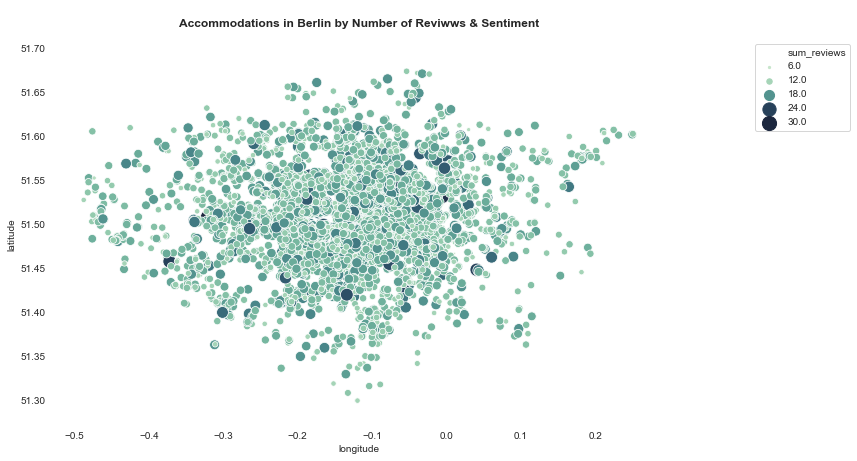

In [142]:
import seaborn as sns
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

ax = sns.scatterplot(x="longitude", y="latitude", size='sum_reviews', sizes=(5, 200),
                     hue='sum_reviews', palette=cmap,  data=scored_df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Berlin by Number of Reviwws & Sentiment\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);